## Convolution Operation

Explanation for the Convolutional layer and Operation Obtained mainly from [here](https://medium.com/analytics-vidhya/2d-convolution-using-python-numpy-43442ff5f381) 

Convolutional Operation means for a given input we re-estimate it as the weighted average of all the inputs around it. We have some weights assigned to the neighbor values and we take the weighted sum of the neighbor values to estimate the value of the current input/pixel.

Now, this matrix of weights is referred to as the Kernel or Filter. In the above case, we have the kernel of size 2X2. with the formula $$ S_{ij}=(I * K)_{ij} = \sum^{m-1}_{a=0}\sum^{n-1}_{b=0}I_{i+a,j+b}K_{a,b} $$  
* m: number of rows(in this case 4) 
* n: number of columns
The operation will go following this way
 
<img src='https://miro.medium.com/v2/resize:fit:640/format:webp/1*l9ylKJ8M35Qo0KFBAsaRyg.png' height='300' width='600'>

The output of this operation would be: $ (aw + bx + ey + fz) $ 

<img src='https://miro.medium.com/v2/resize:fit:360/format:webp/1*fIkg-2xdlTj1kmRN90q5uQ.png' height='100' width='200'> which applied to the other segments will become this -> <img src='https://miro.medium.com/v2/resize:fit:720/format:webp/1*B9zc49InxP2sf5vYxdSUgw.png' height='100' width='600'>

Then we move the filter horizontally by one and place it over the next 2 X 2 portion of the input; in this case pixels of interest would be b, c, f, g and we compute the output using the same technique and we would get:

[Original Code](https://github.com/SamratSahoo/UT-Arlington-Research/blob/master/Week%206%20-%20Convolutions%20%26%20Wavelet%20Transforms/Convolutions.py)

For a bigger deepdive into the argument, you can also refer to the following [pdf which exaplins filters and kernels better](https://mriquestions.com/uploads/3/4/5/7/34572113/types_of_convolution_kernels___simplified___by_prakhar_ganesh___towards_data_science.pdf)

In [2]:
def convolve2D(image, kernel, padding=1, strides=1):
    # Cross Correlation
    kernel = np.flipud(np.fliplr(kernel))

    # Gather Shapes of Kernel + Image + Padding
    xKernShape = kernel.shape[0]
    yKernShape = kernel.shape[1]
    xImgShape = image.shape[0]
    yImgShape = image.shape[1]

    # Shape of Output Convolution
    xOutput = int(((xImgShape - xKernShape + 2 * padding) / strides) + 1)
    yOutput = int(((yImgShape - yKernShape + 2 * padding) / strides) + 1)
    output = np.zeros((xOutput, yOutput))

    # Apply Equal Padding to All Sides
    if padding != 0:
        imagePadded = np.zeros((image.shape[0] + padding*2, image.shape[1] + padding*2))
        imagePadded[int(padding):int(-1 * padding), int(padding):int(-1 * padding)] = image
        #print(imagePadded)
    else:
        imagePadded = image

    # Iterate through image
    for y in range(image.shape[1]):
        # Exit Convolution
        if y > image.shape[1] - yKernShape:
            break
        # Only Convolve if y has gone down by the specified Strides
        if y % strides == 0:
            for x in range(image.shape[0]):
                # Go to next row once kernel is out of bounds
                if x > image.shape[0] - xKernShape:
                    break
                try:
                    # Only Convolve if x has moved by the specified Strides
                    if x % strides == 0:
                        output[x, y] = (kernel * imagePadded[x: x + xKernShape, y: y + yKernShape]).sum()
                except:
                    break

    return output

# Grayscale Image
def processImage(image):
    image = cv2.imread(image)
    image = cv2.cvtColor(src=image, code=cv2.COLOR_BGR2GRAY)
    return image

## Filters

Based on the kernel, filter, applied we will be applying a different kernel we will obtained a different effect. For Example, taking as example the edge detection filter 

$ \begin{bmatrix} -1 & -1 & -1 \\ -1 & 8 & -1 \\ -1 &  -1 & -1 \end{bmatrix} $ we will obtain the effect of choising only the element in the center and disgarding the elements in the edges, thus focalizing only the elements in the center. This is also known as the Laplacian Filter

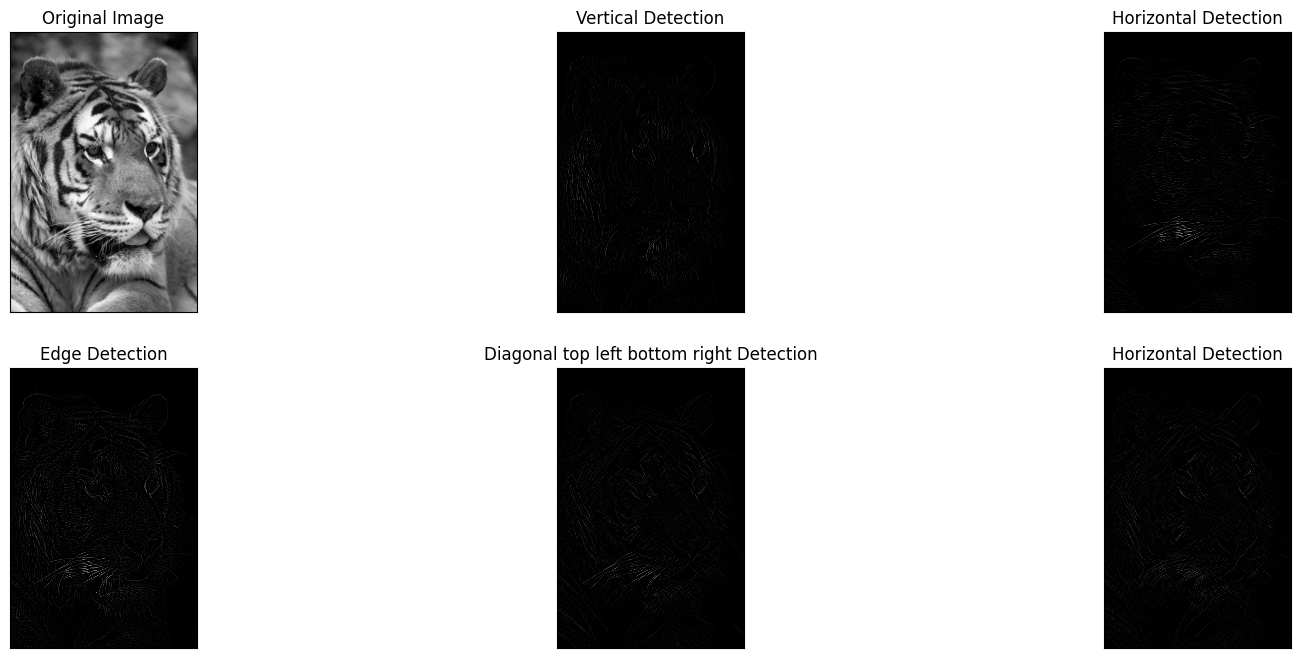

In [9]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

if __name__ == '__main__':
    # Grayscale Image
    image = processImage('images/tiger.jpg')

    # Edge Detection Kernel
    kernel_edge = np.array([[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]])
    # Vertical Detectiin Kernel
    kernel_vertical = np.array([[-1, 2, -1], [-1, 2, -1], [-1, 2, -1]])
    # Horizontal Detectioin Kernel
    kernel_horizontal = np.array([[-1, -1, -1], [2, 2, 2], [-1, -1, -1]])
    # Diagonal top left bottom rightDetectioin Kernel
    kernel_diag_l = np.array([[2, -1, -1], [-1, 2, -1], [-1, -1, 2]])
    # Diagonal bottom left top right Detectioin Kernel
    kernel_diag_r = np.array([[-1, -1, 2], [-1, 2, -1], [2, -1, -1]])
    

    # Convolve and Save Output
    output_1 = convolve2D(image, kernel_edge, padding=1, strides=1)
    output_2 = convolve2D(image, kernel_vertical, padding=1, strides=1)
    output_3 = convolve2D(image, kernel_horizontal, padding=1, strides=1)
    output_4 = convolve2D(image, kernel_diag_r, padding=1, strides=1)
    output_5 = convolve2D(image, kernel_diag_l, padding=1, strides=1)
    #output_1 = cv2.imread(output_1)

    # cv2.imwrite('2DConvolved.jpg', output)
     # https://stackoverflow.com/questions/66997469/both-0-and-255-give-black-image-for-gray-color-map-why-is-that
     # To get your expected black/white output, you need to set vmin and vmax manually. 
     # Otherwise pyplot.imshow() infers the min/max from the data.
     # Note that without setting these, any constant value would produce a black image, not just 0 and 255.
     
    plt.figure(figsize=([10,8]))
    plt.subplot(231),plt.imshow(image, cmap='gray', vmin=0, vmax=255)
    plt.title('Original Image'), plt.xticks([]), plt.yticks([])
    plt.subplot(232),plt.imshow(output_2, cmap='gray', vmin=0, vmax=255)
    plt.title('Vertical Detection'), plt.xticks([]), plt.yticks([])
    plt.subplot(233),plt.imshow(output_3, cmap='gray', vmin=0, vmax=255)
    plt.title('Horizontal Detection'), plt.xticks([]), plt.yticks([])   
    plt.subplot(234),plt.imshow(output_1, cmap='gray', vmin=0, vmax=255)
    plt.title('Edge Detection'), plt.xticks([]), plt.yticks([])
    plt.subplot(235),plt.imshow(output_4, cmap='gray', vmin=0, vmax=255)
    plt.title('Diagonal top left bottom right Detection'), plt.xticks([]), plt.yticks([])
    plt.subplot(236),plt.imshow(output_5, cmap='gray', vmin=0, vmax=255)
    plt.title('Horizontal Detection'), plt.xticks([]), plt.yticks([])   
    plt.show()


## Other Filters
As mentioned in the following [site](https://blog.paperspace.com/filters-in-convolutional-neural-networks/) there are many other filters which can be used.

* $ \begin{bmatrix} -1 & 0 & 1 \\ -1 & 0 & 1 \\ -1 & 0 & 1 \end{bmatrix} $ the Horizontal Prewitt Filter which help to detect horizontal edges.
* $ \begin{bmatrix} 1 & 1 & 1 \\ 0 & 0 & 0 \\ -1 & -1 & -1 \end{bmatrix} $ the Vertical Prewitt Filter which help to detect vertical edges.


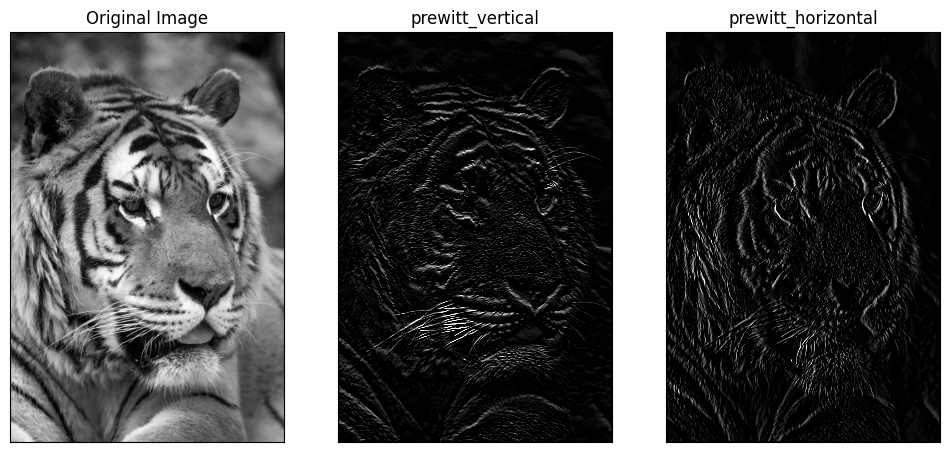

In [10]:
# Blur Kernel
prewitt_vertical = np.array([[1, 1, 1], [0, 0, 0], [-1 ,-1 ,-1 ]])
# Vertical Detectiin Kernel
prewitt_horizontal = np.array([[1, 0 , -1], [1, 0 , -1], [1, 0, -1]])

# Convolve and Save Output
output_1 = convolve2D(image, prewitt_vertical, padding=1, strides=1)
output_2 = convolve2D(image, prewitt_horizontal, padding=1, strides=1)

plt.figure(figsize=([12,12]))
plt.subplot(131),plt.imshow(image, cmap='gray', vmin=0, vmax=255)
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(output_1, cmap='gray', vmin=0, vmax=255)
plt.title('prewitt_vertical'), plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(output_2, cmap='gray', vmin=0, vmax=255)
plt.title('prewitt_horizontal'), plt.xticks([]), plt.yticks([])   
plt.show()


The Sobel operator is also made up of a vertical and horizontal edge detection filter. Detected edges are quite similar to results obtained using Prewitt filters but with a distinction of higher edge pixel intensity. In other words, edges detected using the Sobel filters are sharper in comparison to Prewitt filters.

* $ \begin{bmatrix} -1 & 0 & 1 \\ -2 & 0 & 2 \\ -1 & 0 & 1 \end{bmatrix} $ the Horizontal Prewitt Filter which help to detect horizontal edges.
* $ \begin{bmatrix} 1 & 2 & 1 \\ 0 & 0 & 0 \\ -1 & -2 & -1 \end{bmatrix} $ the Vertical Prewitt Filter which help to detect vertical edges.


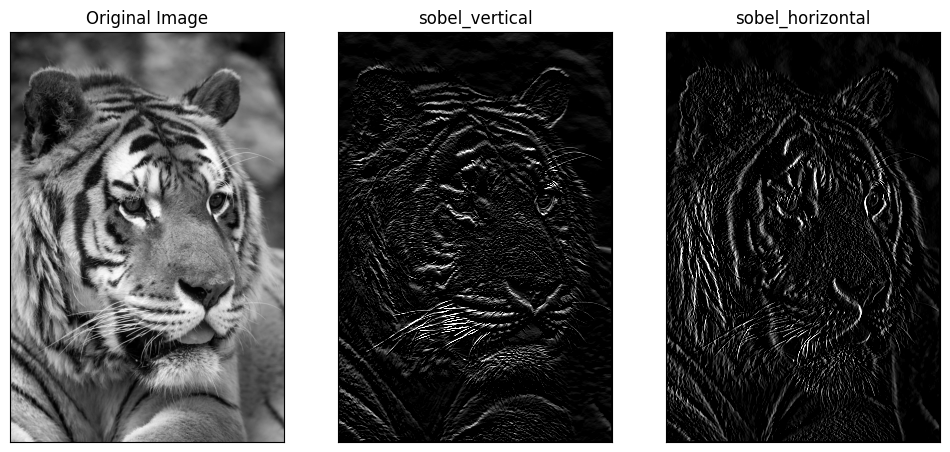

In [11]:
# Blur Kernel
sobel_vertical = np.array([[1, 2, 1], [0, 0, 0], [-1 ,-2 ,-1 ]])
# Vertical Detectiin Kernel
sobel_horizontal = np.array([[-1, 0 , 1], [-2, 0 , 2], [-1, 0, 1]])

# Convolve and Save Output
output_1 = convolve2D(image, sobel_vertical, padding=1, strides=1)
output_2 = convolve2D(image, sobel_horizontal, padding=1, strides=1)

plt.figure(figsize=([12,12]))
plt.subplot(131),plt.imshow(image, cmap='gray', vmin=0, vmax=255)
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(output_1, cmap='gray', vmin=0, vmax=255)
plt.title('sobel_vertical'), plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(output_2, cmap='gray', vmin=0, vmax=255)
plt.title('sobel_horizontal'), plt.xticks([]), plt.yticks([])   
plt.show()

### Robinson Compass Masks

<img src="https://blog.paperspace.com/content/images/2022/06/robinson.png">  
The Robinson Compass masks are edge detection filters which are made up of 8 different filters accounting for the 8 geographical compass directions as shown in the image above. These filters help to detect edges oriented in those compass directions. 


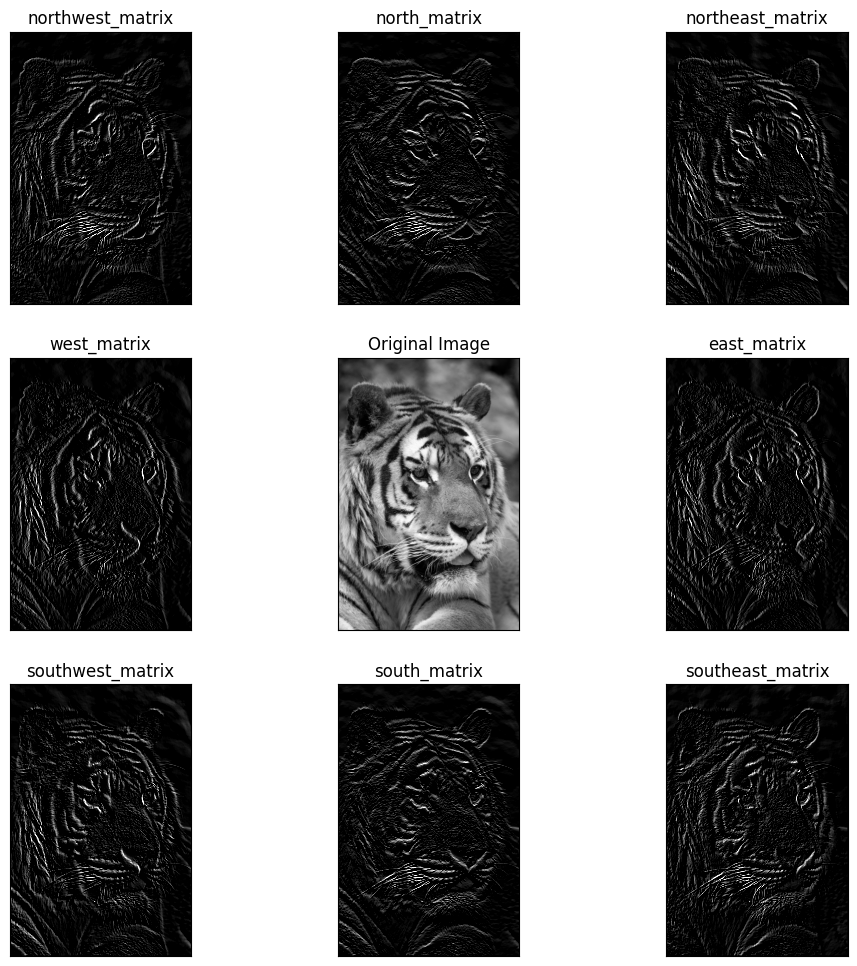

In [12]:
# North
north_matrix = np.array([
    [-1, -2, -1],
    [ 0,  0,  0],
    [ 1,  2,  1]
])

# Northeast
northwest_matrix = np.array([
    [-2, -1,  0],
    [-1,  0,  1],
    [ 0,  1,  2]
])

# East
west_matrix = np.array([
    [-1,  0,  1],
    [-2,  0,  2],
    [-1,  0,  1]
])

# Southeast
southwest_matrix = np.array([
    [ 0,  1,  2],
    [-1,  0,  1],
    [-2, -1,  0]
])

# South
south_matrix = np.array([
    [ 1,  2,  1],
    [ 0,  0,  0],
    [-1, -2, -1]
])

# Southwest
southeast_matrix = np.array([
    [ 2,  1,  0],
    [ 1,  0, -1],
    [ 0, -1, -2]
])

# West
east_matrix = np.array([
    [ 1,  0, -1],
    [ 2,  0, -2],
    [ 1,  0, -1]
])

# Northwest
northeast_matrix = np.array([
    [ 0, -1, -2],
    [ 1,  0, -1],
    [ 2,  1,  0]
])


# Convolve and Save Output
sob_n = convolve2D(image, north_matrix, padding=1, strides=1)
sob_s = convolve2D(image, south_matrix, padding=1, strides=1)
sob_e = convolve2D(image, east_matrix, padding=1, strides=1)
sob_w = convolve2D(image, west_matrix, padding=1, strides=1)
sob_nw = convolve2D(image, northwest_matrix, padding=1, strides=1)
sob_ne = convolve2D(image, northeast_matrix, padding=1, strides=1)
sob_sw = convolve2D(image, southwest_matrix, padding=1, strides=1)
sob_se = convolve2D(image, southeast_matrix, padding=1, strides=1)


plt.figure(figsize=([12,12]))
plt.subplot(331),plt.imshow(sob_nw, cmap='gray', vmin=0, vmax=255)
plt.title('northwest_matrix'), plt.xticks([]), plt.yticks([])
plt.subplot(332),plt.imshow(sob_n, cmap='gray', vmin=0, vmax=255)
plt.title('north_matrix'), plt.xticks([]), plt.yticks([])
plt.subplot(333),plt.imshow(sob_ne, cmap='gray', vmin=0, vmax=255)
plt.title('northeast_matrix'), plt.xticks([]), plt.yticks([])   

plt.subplot(334),plt.imshow(sob_w, cmap='gray', vmin=0, vmax=255)
plt.title('west_matrix'), plt.xticks([]), plt.yticks([])
plt.subplot(335),plt.imshow(image, cmap='gray', vmin=0, vmax=255)
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(336),plt.imshow(sob_e, cmap='gray', vmin=0, vmax=255)
plt.title('east_matrix'), plt.xticks([]), plt.yticks([])   

plt.subplot(337),plt.imshow(sob_sw, cmap='gray', vmin=0, vmax=255)
plt.title('southwest_matrix'), plt.xticks([]), plt.yticks([])
plt.subplot(338),plt.imshow(sob_s, cmap='gray', vmin=0, vmax=255)
plt.title('south_matrix'), plt.xticks([]), plt.yticks([])
plt.subplot(339),plt.imshow(sob_se, cmap='gray', vmin=0, vmax=255)
plt.title('southeast_matrix'), plt.xticks([]), plt.yticks([])   
plt.show()

# 3d Colors

Following [this guide the code](https://medium.com/theleanprogrammer/3-dimensional-convolution-7041ca7f3e81) while a beter explanation comes from [here for both low pass filter and high Pass filter](https://cdn.diffractionlimited.com/help/maximdl/MaxIm-DL.htm#Tutorials.htm)

## Low pass filter 
<img src="https://cdn.diffractionlimited.com/help/maximdl/image/M81Before.png"> <img src='https://cdn.diffractionlimited.com/help/maximdl/image/M81LowPass.png'> A low-pass filter, also called a "blurring" or "smoothing" filter, averages out rapid changes in intensity. The simplest low-pass filter just calculates the average of a pixel and all of its eight immediate neighbors. The result replaces the original value of the pixel. The process is repeated for every pixel in the image.

The kernel applied is this $ \begin{bmatrix} 1/9 &  1/9 &  1/9 \\  1/9 &  1/9 &  1/9 \\  1/9 &  1/9 &  1/9 \end{bmatrix}  $ and to reduce the avagering tihs can be applied 
 $ \begin{bmatrix} 0 & 1/8 & 0 \\ -1/8 & 1/2 & 1/8 \\ 0 & 1/8 & 0 \end{bmatrix} $ 

## High pass filter 

A high-pass filter can be used to make an image appear sharper. These filters emphasize fine details in the image – exactly the opposite of the low-pass filter. High-pass filtering works in exactly the same way as low-pass filtering; it just uses a different convolution kernel. 

Unfortunately, while low-pass filtering smooths out noise, high-pass filtering does just the opposite: it amplifies noise. You can get away with this if the original image is not too noisy; otherwise the noise will overwhelm the image. MaxIm DL includes a very useful "range-restricted filter" option; you can high-pass filter only the brightest parts of the image, where the signal-to-noise ratio is highest.




In [ ]:
def convolve3D(arr, height, width, kernel):
    convoluted_matrix = []
    for i in range(1,height-2):
        for j in range(1,width-2):
            temp = arr[i:i+3, j:j+3]
            prod = np.multiply(temp,kernel)
            convoluted_matrix.append(np.sum(prod))
    convoluted_matrix = np.array(convoluted_matrix).reshape(height-3,width-3)
    return convoluted_matrix

In [ ]:
def convolve3D_kernel_5x5(arr, height, width, kernel):
    convoluted_matrix = []
    for i in range(1,height-4):
        for j in range(1,width-4):
            temp = arr[i:i+3, j:j+3]
            prod = np.multiply(temp,kernel)
            convoluted_matrix.append(np.sum(prod))
    convoluted_matrix = np.array(convoluted_matrix).reshape(height-3,width-3)
    return convoluted_matrix

In [67]:
def convolve3D_v2(arr, height, width, kernel):
    # it is with padding ! 
    convoluted_matrix = []
    kernel_size = kernel.shape[0]
    padding = kernel_size // 2  # Amount of padding to add around the input array
    
    # Pad the input array to handle edge cases
    arr_padded = np.pad(arr, ((padding, padding), (padding, padding)), mode='edge')
    
    # Perform convolution
    for i in range(padding, height + padding):
        for j in range(padding, width + padding):
            temp = arr_padded[i - padding:i + padding + 1, j - padding:j + padding + 1]
            prod = np.multiply(temp, kernel)
            convoluted_matrix.append(np.sum(prod))
    
    convoluted_matrix = np.array(convoluted_matrix).reshape(height, width)
    return convoluted_matrix


In [122]:
def apply_kernel(image,filter_blue,filter_red,filter_green):
    # pixels extracted from image
    height, width, channels = image.shape
    pixels = []
    for i in range(height):
        for j in range(width):
            pixels.append(image[i,j])

    # Word Of Caution: The imread function reads the pixel's values as (b,g,r) as opposed to the (r,g,b) notation.
    b=[]
    g=[]
    r=[]

    # Extracting the color channels from the image
    for i in pixels:
        b.append(i[0])
        g.append(i[1])
        r.append(i[2])

    r = np.array(r).reshape(height,width)
    b = np.array(b).reshape(height,width)
    g = np.array(g).reshape(height,width)

    r_convol = convolve3D_v2(r, height, width, filter_red)
    g_convol = convolve3D_v2(g, height, width, filter_green)
    b_convol = convolve3D_v2(b, height, width, filter_blue)

    print(r_convol.shape, b_convol.shape, g_convol.shape)

    #height = height - 3
    #width = width - 3 

    combine = np.zeros([height, width, channels], dtype=np.uint32)

    for i in range(height):
        for j in range(width):
            combine[i,j] = [int(r_convol[i][j]), int(g_convol[i][j]), int(b_convol[i][j])]

    return combine

In [152]:
# Low pass Filter 3x3
# A blurring kernel should always sum up to 1. If it adds up to 0.5, for example, the average intensity of the output image will be half of that of the input.

def low_pass_kernel(size):
    blur = 1/(size*size)
    blue_kernel = blur * np.ones([size,size])
    red_kernel = blur * np.ones([size,size])
    green_kernel = blur * np.ones([size,size])
    return blue_kernel, red_kernel, green_kernel

high_pass_kernel = np.array(([-1, -1, -1, -1, -1],
                             [-1, -2, -2, -2, -1],
                             [-1, -2, 32, -2, -1],
                             [-1, -2, -2, -2, -1],
                             [-1, -1, -1, -1, -1]))

norm = np.linalg.norm(high_pass_kernel)
high_pass_kernel = high_pass_kernel / norm
high_pass_kernel

array([[-0.03054236, -0.03054236, -0.03054236, -0.03054236, -0.03054236],
       [-0.03054236, -0.06108472, -0.06108472, -0.06108472, -0.03054236],
       [-0.03054236, -0.06108472,  0.97735555, -0.06108472, -0.03054236],
       [-0.03054236, -0.06108472, -0.06108472, -0.06108472, -0.03054236],
       [-0.03054236, -0.03054236, -0.03054236, -0.03054236, -0.03054236]])

In [157]:
image = cv2.imread('images/tiger.jpg')
from scipy.ndimage import gaussian_filter
gauss_img = gaussian_filter(cv2.cvtColor(image, cv2.COLOR_BGR2RGB), 3)
blue_kernel, red_kernel, green_kernel = low_pass_kernel(9)

# Applying the kernel
height, width, channels = image.shape
print(" Image information:\n Height:{}\n Width: {}\n Channles: {}".format(height,width,channels))
low_pass_img = apply_kernel(image, blue_kernel, green_kernel, red_kernel)
height, width, channels = low_pass_img.shape
print("\n Low Pass Filtered Image information: \n Height: {}\n Width: {}\n Channels: {}".format(height,width,channels))
high_pass_img = apply_kernel(image, high_pass_kernel, high_pass_kernel, high_pass_kernel)
height, width, channels = high_pass_img.shape
print("\n High Pass Filtered Image information: \n Height: {}\n Width: {}\n Channels: {}".format(height,width,channels))

 Image information:
 Height:960
 Width: 640
 Channles: 3
(960, 640) (960, 640) (960, 640)

 Low Pass Filtered Image information: 
 Height: 960
 Width: 640
 Channels: 3
(960, 640) (960, 640) (960, 640)


/tmp/ipykernel_4038/1003548246.py:37: DeprecationWarning: NumPy will stop allowing conversion of out-of-bound Python integers to integer arrays.  The conversion of -1 to uint32 will fail in the future.
For the old behavior, usually:
    np.array(value).astype(dtype)
will give the desired result (the cast overflows).
  combine[i,j] = [int(r_convol[i][j]), int(g_convol[i][j]), int(b_convol[i][j])]
/tmp/ipykernel_4038/1003548246.py:37: DeprecationWarning: NumPy will stop allowing conversion of out-of-bound Python integers to integer arrays.  The conversion of -2 to uint32 will fail in the future.
For the old behavior, usually:
    np.array(value).astype(dtype)
will give the desired result (the cast overflows).
  combine[i,j] = [int(r_convol[i][j]), int(g_convol[i][j]), int(b_convol[i][j])]
/tmp/ipykernel_4038/1003548246.py:37: DeprecationWarning: NumPy will stop allowing conversion of out-of-bound Python integers to integer arrays.  The conversion of -3 to uint32 will fail in the future.



 High Pass Filtered Image information: 
 Height: 960
 Width: 640
 Channels: 3


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


<function matplotlib.pyplot.show(close=None, block=None)>

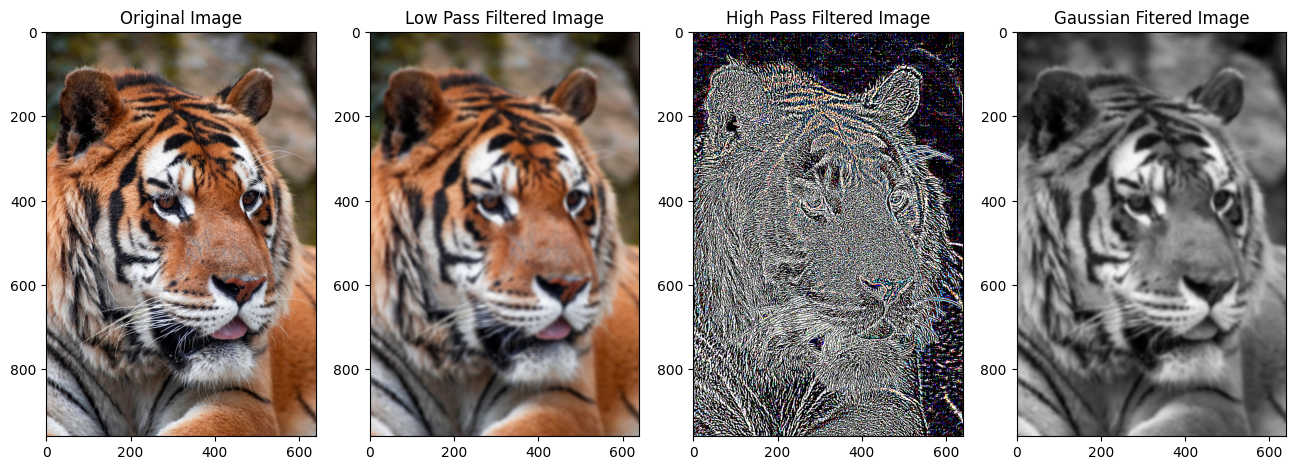

In [158]:
plt.figure(figsize=([16,10]))
plt.subplot(141),plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB), vmin=0, vmax=255)
plt.title('Original Image'), 
plt.subplot(142),plt.imshow(low_pass_img, vmin=0, vmax=255)
plt.title('Low Pass Filtered Image'),
#high_pass_img = image - low_pass_img
plt.subplot(143),plt.imshow(high_pass_img, vmin=0, vmax=255)
plt.title('High Pass Filtered Image'), 
plt.subplot(144),plt.imshow(gauss_img, vmin=0, vmax=255)
plt.title('Gaussian Fitered Image'), 
plt.show

## Convolutinal Neural Networks

Now these that you have seen are some of the possible fitlers whcih can nbe applied to an image and can be grupped into Linear Transformations. These linear transfomrations can ne pixed up in a very subtle and easy way from the neural network. Take into consideration VGG16 which has a 1st CNN layer with 256 filters. These which you see above are just 3 of the possible fitlers and in train the vgg16 compute the ideal filters, not precisely these to classify the images. So in picking the ideal fitlers and parameters it does so in an incredible more precise way, better than any human might actually do ! 

So the ideal question you could make is what kind of preprocessing can i apply to my image before feeding it into a neural network ? 

An answer could be: Nonlinear Transfomrations, if all the linear transofrmations of this kind can be picked quite easily from CNN architecture. Now what is a list of nonlinear transormations which can be applied to an image ?! 